## Exploring and pre-processing the data
The dataset contains **1500 rows and 8 columns** in total with missing values present in the "weight" and "category" columns. The datset has "weight" with 20 rows of missing data store as "NA" and the "reviewer_age" column has 13 missing values stored as "-". I have validated the data and pre-processed the data according to the instructions in the project description.

* booking_id: Same as description. Nominal data with no missing values. It is a unique identifier of booking. No changes were made.
* months_as_member: Same as description. Discrete data with no missing values. lists the number of months of membership tied to the member booking id number. No changes were made.
* weight: The weight column contains continuous data as described with 20 occurances of missing values stored as NA. Missing values have been replaced with the overall average weight and all values have been rounded to 2 decimal places. All values have been confirmed to be no less than the minimum value of 40kg specified in the instructions.
* days_before: The days_before column contains discrete data as described. There are no missing values but the data has been preprocess to remove unnecessary text strings and change the column data to numeric type data.
* day_of_week: the day_of_week column includes ordinal data as described. The original data was not consistent with the description in the instructions in that there were some instances of as '.' character at the end of some strings and some days were spelled out completely. There was no missing data but data was processed to match the "ddd" abbreviated format instructed.
* time: The time column contains Ordinal data as described. the time is not specific and only presents the binary 'AM' or 'PM' values it is however in the context of this scenario 'AM' and 'PM' categories represent the different periods of the day in which classes are offered leading to the assumption that morning (AM) classes occur before evening (PM) classes. It is possible to categorize this as nominal in some cases but in this context of GoalZone predicting class attendance I beleive it is ordinal as described because the distinction that morning classes are before evening classes can be an important consideration when trying to achieve GoalZone's goal.
* category: the category column contains Nominal data as described. It represents the category of the workout or exercise. There are 13 instances of missing values that are represented by the '-' character. These instances of '-' were replaces with the text string 'unknown'.
* attended: the attended column contains Nominal data as described. It represents whether the booking was attended or not.  0 and 1 represent two distinct categories or states. There are no missing values. 

After the data validation the dataset continues to contain **1500 rows and 8 columns**. 4 columns were modified in the dataset: weight to replaced the NA values with the overall average weight and rounded to 2 decimal places after the missing values were replaced with the average orverall weight, days_before to only include numeric values as there were some appended text strings in the original data, day_of_week to match the 'ddd' format provided, and the category column to replace all missing values stored as '-' with the text string 'unknown'.


## Original Dataset

In [78]:
import pandas as pd
df =  pd.read_csv('fitness_class_2212.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


## Validate Categorical variables

In [79]:
cat = ['day_of_week','time','category','attended']
for column in cat:
    print(df[column].value_counts())

Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64
AM    1141
PM     359
Name: time, dtype: int64
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64
0    1046
1     454
Name: attended, dtype: int64


## Validate Numerical values not including unique booking id or the binary attended variable and clean the days_before column to remove text strings and convert to numeric type data.

In [80]:
#days before column contains text string on some values. remove text and converts the column numeric type data
df['days_before'] = df['days_before'].replace(r'[^0-9.]', '', regex=True)
df['days_before'] = pd.to_numeric(df['days_before'])

numerical_columns = ['months_as_member','weight','days_before']
df[numerical_columns].describe()

,months_as_member,weight,days_before
count,1500.000000,1480.000000,1500.000000
mean,15.628667,82.610378,8.346667
std,12.926543,12.765859,4.077938
min,1.000000,55.410000,1.000000
25%,8.000000,73.490000,4.000000
50%,12.000000,80.760000,9.000000
75%,19.000000,89.520000,12.000000
max,148.000000,170.520000,29.000000


## Check missing values stored as "NA" in dataframe columns

In [81]:
df.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

## Check missing values stored as "-" in the category column

In [82]:
dash_count = df['category'].str.count('-').sum()
print(f'There are {dash_count} missing values in the category column.')

There are 13 missing values in the category column.


## Clean the weight column to replace all NA values with the overall average weight. Also ensuring that all values are rounded to 2 decimal places after inserting the average overall weight into the column.

In [83]:
avg_weight = df['weight'].mean()
df['weight'].fillna(avg_weight, inplace =True)
df['weight']
df['weight'] = df['weight'].round(2)
df['weight']

0       79.56
1       79.01
2       74.53
3       86.12
4       69.29
        ...  
1495    79.51
1496    89.55
1497    87.38
1498    68.64
1499    94.39
Name: weight, Length: 1500, dtype: float64

## Clean day_of_week column by to match the format provided in the instruction file. There are no missing values.

In [84]:
# Change the 'day_of_week' column to include only the first 3 characters to match the weekday short hand provided in the instructions.
df['day_of_week'] = df['day_of_week'].str[:3]

df['day_of_week'].head(20)

0     Wed
1     Mon
2     Sun
3     Fri
4     Thu
5     Mon
6     Wed
7     Fri
8     Fri
9     Fri
10    Tue
11    Fri
12    Sun
13    Tue
14    Fri
15    Sun
16    Sun
17    Thu
18    Thu
19    Tue
Name: day_of_week, dtype: object

## Replace missing values stored as '-' to with 'unknown' in the category column

In [85]:
df['category'] = df['category'].replace('-','unknown')
unknown_count = df['category'].str.count('unknown').sum()
print(f"{unknown_count} missing values stored as '-' have been replaced with 'unknown'.")

13 missing values stored as '-' have been replaced with 'unknown'.


## Validate and display cleaned dataset

In [86]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   int64  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 93.9+ KB


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


## Validate categorical variables after cleaning 

In [87]:
cat = ['day_of_week','time','category','attended']
for column in cat:
    print(df[column].value_counts())

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64
AM    1141
PM     359
Name: time, dtype: int64
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: category, dtype: int64
0    1046
1     454
Name: attended, dtype: int64


## Validate numerical values after cleaning, not including unique booking id or the binary attended variable.

In [88]:
df[numerical_columns].describe()

,months_as_member,weight,days_before
count,1500.000000,1500.000000,1500.000000
mean,15.628667,82.610373,8.346667
std,12.926543,12.680411,4.077938
min,1.000000,55.410000,1.000000
25%,8.000000,73.562500,4.000000
50%,12.000000,81.035000,9.000000
75%,19.000000,89.382500,12.000000
max,148.000000,170.520000,29.000000


## Bar plot desciption
*In output below we can see the total number of members who attended and did not attend class in the bar plot and can see that those who did not attend classes have the most number of observations. We can also see that the observations are not balanced across the 1 or 'attended' and 0 or 'not attended' categories with instances of members who did not attend being almost twice as much as members who did attend classes they booked*

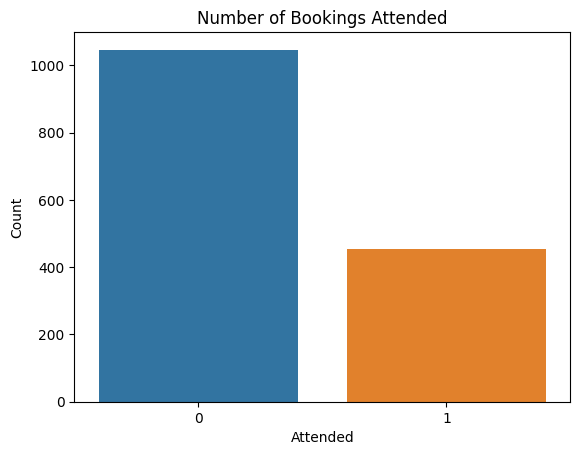

The Not attended, or 0, category has the most number of observations.
The observations are NOT balanced.


In [89]:
#counting the number of reviews from owners and non owners
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot
sns.countplot(x='attended', data=df)

# Add labels and title
plt.xlabel('Attended')
plt.ylabel('Count')
plt.title('Number of Bookings Attended')

# Show the plot
plt.show()

attended_count = df['attended'].value_counts()
attended_v_not_attended = attended_count.index[0]
if attended_v_not_attended == 1:
    print(f'The Attended, or 1, has the most number of observations.')
else:
    print(f'The Not attended, or 0, category has the most number of observations.')

if attended_count[0] == attended_count[1]:
    print("The observations are balanced.")
else:
    print("The observations are NOT balanced.")

## Describing the distribution and the histogram below
*Using the .describe() function we can see that the total number of observations are 1500 datapoints, an average months as a member of  15.628667, the standard deviation of the data is 12.926543, the shortest tenure as member is 1 month, 25% of members have been members for 8 months, 50% of of members have been members for less than or equal to 12 months, and 75% of members have been members for less than or equal to 19 months, and the longest tenure as a member is 148 months. As can be seen in the histogram and the result from the scipy skew() function the distribution is displaying a right or positive skew in its distribution.*

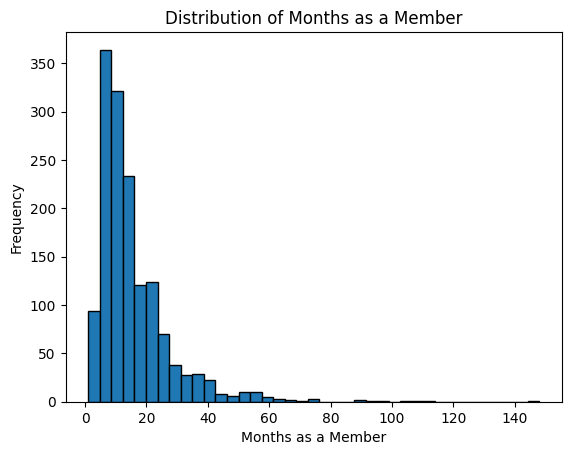

count    1500.000000
mean       15.628667
std        12.926543
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max       148.000000
Name: months_as_member, dtype: float64
3.136641126368661


In [90]:
from scipy.stats import skew
# Select the 'months_as_member' column from the DataFrame
months_as_member = df['months_as_member']

# Create a histogram using Matplotlib
plt.hist(months_as_member, bins=39, edgecolor='black')
plt.xlabel('Months as a Member')
plt.ylabel('Frequency')
plt.title('Distribution of Months as a Member')
plt.show()

# Describe the distribution
print(months_as_member.describe())
print(skew(months_as_member))

## Describing the relationship between attendance and number of months as a member
*The boxplot below shows that the average overall membership tenure for the 1 or 'attended' category shows a higher and more dispersed tenure of membership with a visually slighty lower and more dispersed number outliers past the upper bound of the distribution and no outliers in the lower bound of the distribution. We can also see that the number of months as a member reflects a lower average overall tenure as a member and concentrated in the 0 or 'did not attend' category, with visually slighty higher and more concentrated instance of outliers past the upper bound of the distribution*

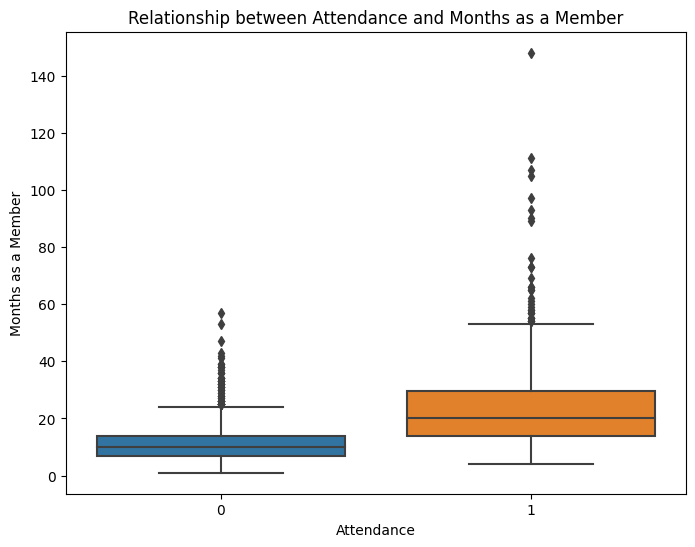

In [91]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='attended', y='months_as_member', data=df)

# Customize the plot
plt.title('Relationship between Attendance and Months as a Member')
plt.xlabel('Attendance')
plt.ylabel('Months as a Member')

# Display the plot
plt.show()

## Determining what type of machine learning model should be used
*A regression based supervised machined learning model is appropirate for this problem, specifically a logistic regression base model given the binary nature of the owned category and the binary nature of the problem "predict whether a member will attend (1) or not attend (0)"*

## Building the appropriate machine learning model
*Regression based supervised machine learning model. Specifically a logistic regression based machine learning model.*

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(df[['months_as_member']], df['attended'], test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7444444444444445


## Building a comparison model
*for the comparison model I chose a decision tree classifier as this is something I have used in a similar problem in my graduate data mining and machine learning course. it is a supervised machine learning model that was used in conjunction with a logistic regression based model to predict the binary classification problem. It seems to be the best comparison to the logistic regression model in my opinion*

In [93]:
from sklearn.tree import DecisionTreeClassifier
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(df[['months_as_member']], df['attended'], test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_dt, y_train_dt)
y_pred_dt = dt.predict(x_test_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print("Decision Tree accuracy:", accuracy_dt)

Decision Tree accuracy: 0.7177777777777777


## Why were these models chosen
*the company's goal is a binary classification problem to predict whether a will or will not attend which is a binary outcome similar to credit risk scoring using a logistic regression. Using membership tenure is the best predictor to use in this dataset. In this case building out a logistic regression supervised learning model is the ideal tool to achieve the GoalZone's goal. The decision tree model is a good comparison model because it is also frequently used for binary classification problems like the one presentated by the company, however decision tree models are used when the decision boundaries are are complex and nonlinear.*

## Model accuracy
*Based on the sklearn accuracy_score for each model I am confident that using the logistic regression based model will be able to predict whether a attend or not attend a class based on membership tenure with greater accuracy than the decision tree model*

In [94]:
print("Logistic regression accuracy:", accuracy)
print("Decision Tree accuracy:", accuracy_dt)

Logistic regression accuracy: 0.7444444444444445
Decision Tree accuracy: 0.7177777777777777


## Explanation of the models and why the logistic regression outperformed the decision tree classifier model
*It is very likely that the logistic regression model performance better because the decision tree model mave have overfit the training set and did not generalize well enough during testing. This is a common issue with decision tree models use in this manner. The logisitic regression model ourperformed very likely because of the binary decision boundary present in the data.*